# Data on Placement, to know which factors affect placement 

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
df = pd.read_csv('Placement_Data_Full_Class.csv')

### Get to know how our data looks like(Data Understanding)

In [14]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [15]:
df.describe()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### For Further processing we need to look after Nan values

In [16]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

###   Wrangling and Looking the relation between different features
        Dealing with Nan
       

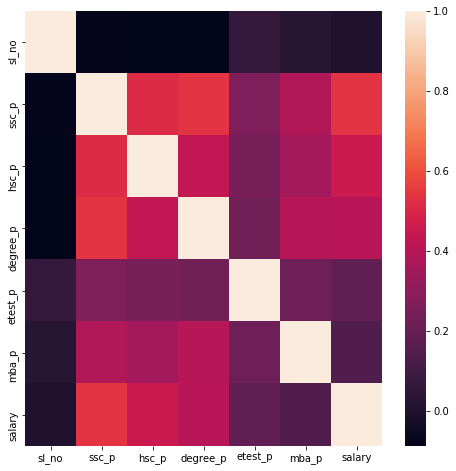

In [17]:
df['salary']= df['salary'].replace(np.nan, 0)
plt.figure(figsize =(8,8))
sns.heatmap(data=df.corr())
plt.show()


###  Who is getting more placements girls or boys and what are the ranges?

The mean salary of Male is 215043.0 while Female is 168816.0
The median salary of Male is 250000.0 while Female is 216000.0


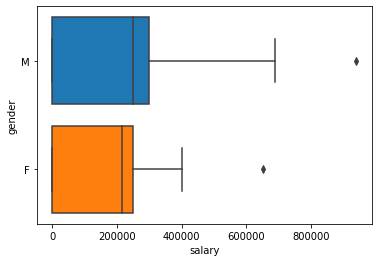

In [18]:
sns.boxplot(x = df['salary'],y= df['gender'],saturation=1)
mean_of_both=round(df['salary'].groupby(df['gender']).mean())
median_both=round(df['salary'].groupby(df['gender']).median())
print('The mean salary of Male is {} while Female is {}'.format(mean_of_both[1],mean_of_both[0]))
print('The median salary of Male is {} while Female is {}'.format(median_both[1],median_both[0]))
plt.show()


From the above plot We can infer the following details:
<ol>
    <li>The Range of salary is high for boys with the median of 2.5 Lakhs per annum</li>
    <li>The Median salary for girls is 2.1 Lakhs per annum</li>
    <li>The highest package is offered to a boy which is nearly to 10 Lakhs per annum</li>
    <li>The highest package offered for girls is  near to 7 Lakhs per annum</li>
   
</ol>


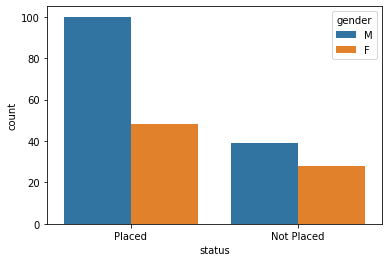

In [19]:
sns.countplot(df['status'],hue=df['gender'])
plt.show()

From the above figures we can ,clearly identify that boys are getting more placed 

###  Which board students are gettting more placed and who got higher package?

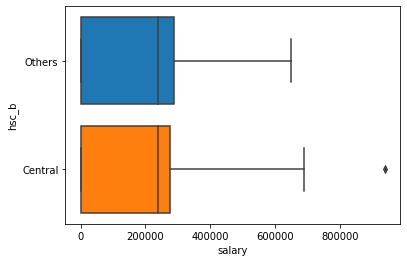

In [20]:
sns.boxplot(x = df['salary'],y= df['hsc_b'],saturation=1)
plt.show()


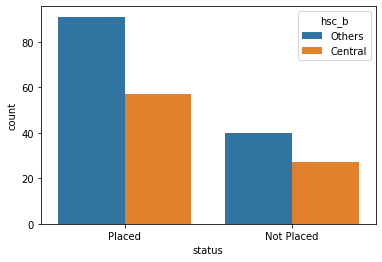

In [21]:
sns.countplot(df['status'],hue=df['hsc_b'])
plt.show()

We can conclude that other boards students are getting more placed ,but students from central board got highest package

### Which stream students are getting more placed and which stream students are mostly not placed?

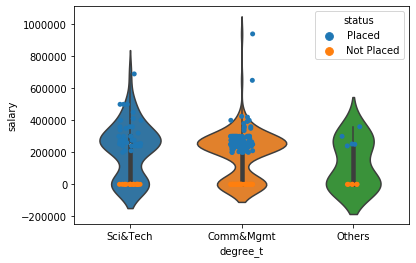

In [22]:

sns.violinplot(x=df["degree_t"], y=df["salary"], data=df)
sns.stripplot(x=df["degree_t"], y=df["salary"], data=df,hue=df['status'])
plt.show()

The stream in which the students mostly get placed are Commucation and management , also science and technology students are mostly getting placed and other stream students are not getting that much placements due to less number of students...

### Which Stream students after the 12 have changed their stream mostly ?

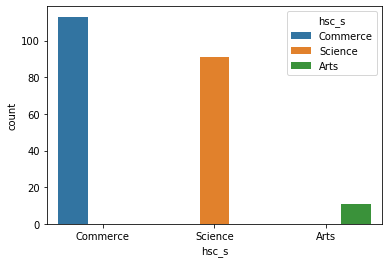

In [23]:
sns.countplot(df['hsc_s'],hue=df['hsc_s'])
plt.show()


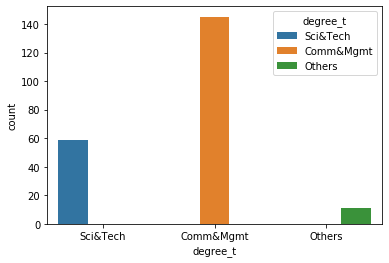

In [24]:
sns.countplot(df['degree_t'],hue=df['degree_t'])
plt.show()


Science stream students are changing their stream mainly after 12.

### Does Percentage in College determine salary

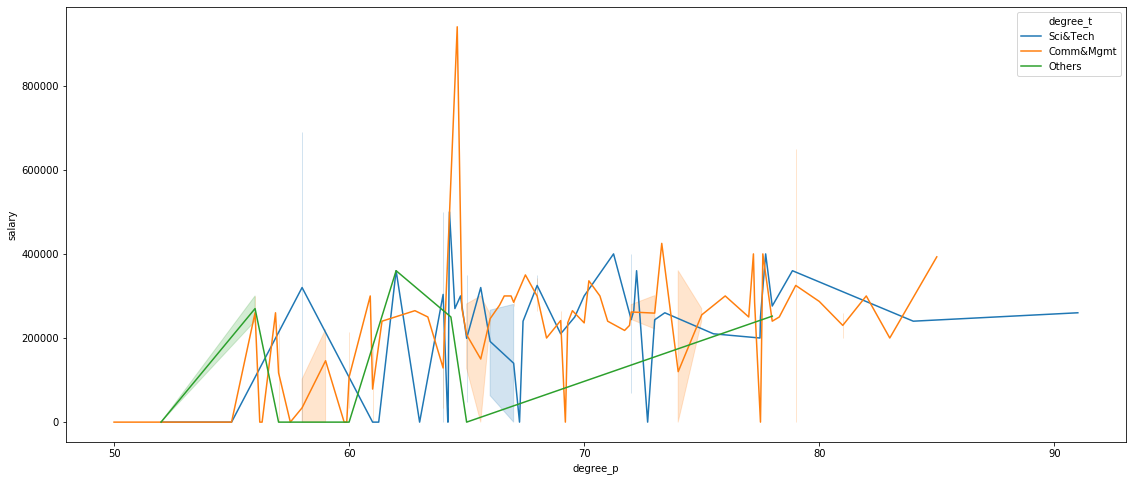

In [25]:
plt.figure(figsize =(19,8))
sns.lineplot(df["degree_p"], df["salary"], hue=df["degree_t"], data=df)

plt.show()

* Percentage does not seem to affect salary.
* Commerce&Mgmt students occasionally get dream placements with high salary

###  If we are having work experince,what is the status in getting placed ?

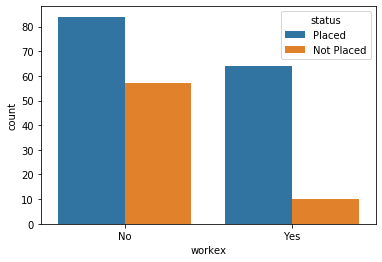

In [26]:
sns.countplot(df["workex"], hue=df["status"], data=df)
plt.show()

From the above ,scenario we can see that those who have work experience are mostly placed,also those who don't have work experience are placed but many students are there who have not been placed ,those who didnt have a work experience. 

# Now we will create model to predict that someone is placed or not

In [31]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Data Pre-Processing

In [34]:
df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)#dropping ssc_b and hsc_b 
df.dtypes #checking the datatype

sl_no               int64
gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

### Changing categorical values into numerical 

In [35]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["hsc_s"] = df.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
df["degree_t"] = df.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [36]:
data_clf = df.copy()#creating a copy of our data

### Dropping salary feature

In [37]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [38]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Modelling and Deployment

In [41]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

### Checking Accuracy

In [42]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7538461538461538
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.76      0.90      0.83        42

    accuracy                           0.75        65
   macro avg       0.75      0.69      0.70        65
weighted avg       0.75      0.75      0.74        65

